# The Machine Learning Workflow Annotated

Source: [Pytorch / Learn the Basics](https://pytorch.org/tutorials/beginner/basics/intro.html)

```{attention} TODO
- Explain logit stuff & give math formulas
- Show that the neural network accepts batched data
- Plot ReLU graph
- Annotate & tweak learning
```

In [1]:
import torch
import torchvision

## The FashionMNIST Dataset 

In [2]:
# Download training data from open datasets.
training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

# Download test data from open datasets.
test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

In [3]:
data = torchvision.datasets.FashionMNIST(root="data") # by default: training data set, no input/output transform, no download
data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train

In [4]:
# data is list-like ; each item in an input-output pair
datum = data[0]
datum

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [5]:
image, index = datum

In [6]:
image

In [7]:
# The output is a number that denotes the class of the pictured object. The list of categories is:
print(data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
# Get the category name from the index:
data.classes[index] # that checks out!

'Ankle boot'

In [9]:
import pandas as pd
df = [{"image": image, "category": data.classes[index]} for image, index in data]
df = pd.DataFrame(df)
df

,image,category
0,<PIL.Image.Image image mode=L size=28x28 at 0x...,Ankle boot
1,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top
2,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top
3,<PIL.Image.Image image mode=L size=28x28 at 0x...,Dress
4,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top
...,...,...
59995,<PIL.Image.Image image mode=L size=28x28 at 0x...,Sandal
59996,<PIL.Image.Image image mode=L size=28x28 at 0x...,Trouser
59997,<PIL.Image.Image image mode=L size=28x28 at 0x...,Dress
59998,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top


In [10]:
import base64
import io
from IPython.display import HTML

def image_formatter(image):
    with io.BytesIO() as buffer:
        image.save(buffer, "jpeg")
        _bytes = buffer.getvalue()
    _base64 = base64.b64encode(_bytes).decode("ascii")
    return f'<img src="data:image/jpeg;base64, {_base64}">'

HTML(df.head().to_html(formatters={'image': image_formatter}, escape=False))

,image,category
0,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APn+tbw1oNx4m8QWmkWx2yXD4LkZCADJJ+gFbviL4a63oc7COE3MW4hdn38duD976jNc9daDqllIsc9lKrMu4YGeMkdR7gj8KzcV7H8BtEvV16+1iWCeG1Wz8mOV02pIzupwCeuAp6Z98cZ90aIzLIlw0c0ZJ4KgjHoeOa+evjS9n/wnMcNxBPCYLKONFhA2FNzMpGenDcgd816V4K03wefC+m3NlpVhP+5QSXBiR5fMx825iMg5zwce3FdbOzTwgW90lu6uCm8eYrL02soIyCPQgggEdMGQ3cluiPNK0rJwrRQBNueuMkt+teNfGKxsdY8WWdxNqcNo66eieXMwVsb5DnH415Hp2rajpE5n02/urOUjBe3laMkehIPIrVm8eeLrhNknibVivoLtx/I1UPinxC3XXtUP1vJP8ay5JZJpGkldnduSzHJP41//2Q=="">",Ankle boot
1,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOB+E3gyz8V6xez6lE01jYRqWiDFQ8jk7QSOcYVjxjoK9hlufDultLpcPhSa5itZdjra6NFNCshiEh5Yj5tmCTTjpvhnxg9zYX/huSCe3SMyLeWC20yI+7aUZTnb8jcA446V81a7pcmh69qGlytue0uHh3f3gpIB/Ec/jXSeBfiJf+CvMt7ezsp7a4lV5vORg/HHDKR2z1z1NfQF94U8Oapez3l7o9vczzkGSSR5MvjAGcMB0C9B2rC8Uz2Xw28LXGp+HdIsoJ5JIoCr+YyNyx5y2eMtjBHJr5517WrrxFrdzq16sS3FwwLiJdqjAAGB9AKzq+zkXjAAGcnivP8A4zLu8ATf7N1C/wCrD+tfONFfUf8AwlV5AmBbWrbQACwf0Ho1cV8S/Edzqfg66t5be2RTLFzGHzw2e7GvEa//2Q=="">",T-shirt/top
2,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APn+vX/DGqaVa6HZw6r4X07VQIFMLyxqrpkZIJ2/MM5P4nrXH+PZUuLu0njs7a0VlcLDbRBERQRhRgc49fc1yFFenaeANMsx6QRj/wAdFc/41H7uwOOcyc+3yf8A165GivUbVSlnAh6rEgP/AHyKwPGa7rK0fH3JGHX1A/wrjaK6zRPEN5Ni2mWKQImA7Kdxx6kGsfWdXudSmEc2xY4idqRjAz6nPJNZdf/Z"">",T-shirt/top
3,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APHfBp0z/hKLRdWSNrd22KZseWrnhS4PG3PXPHc8A17c95bWoiiawsW8n/VK9oj+Uf8AZ4+X8K434kXmnXOjGe9t4n1CZgttKiBZMjqS2MlQD0Oeo6da8lor3OZzeQWsqFGZ7dCwEijB2D34rg/iIXM2nbiCPLfowIByCeh9MVxFaGh2iX+uWVtIu6N5V3r6qOSPyBr1eS1iklWZoIWdoppM+WOQFBB6fWs7xzpUUnhiSWKFFNrLn5VA29PTsVZPyFeU1c0vUZdJ1GK9gSN5It20SAleVI7EetdHJ441P7NbuILMGOLygAjYKkMv970qvqPjrVdTsLi0mitEW4wJHjjIY4VV9cdFHauYr//Z"">",Dress
4,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APn+vp6f4feFNcg0LUIfDdlsleJrrypGgAt2iZtwVGUFg5TsSRn8PJ/jTYWGm+NbeDTrK2tIfsEbGO2iWNSxZ+cDv

In [11]:
# Torch only want to deal with numeric array called "tensors", not images.
# So, it is perfectly happy with the output as a numeric value, but we need to transform the input
image_to_tensor = torchvision.transforms.ToTensor()
t = image_to_tensor(image)
t

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [12]:
t.shape, t.dtype

(torch.Size([1, 28, 28]), torch.float32)

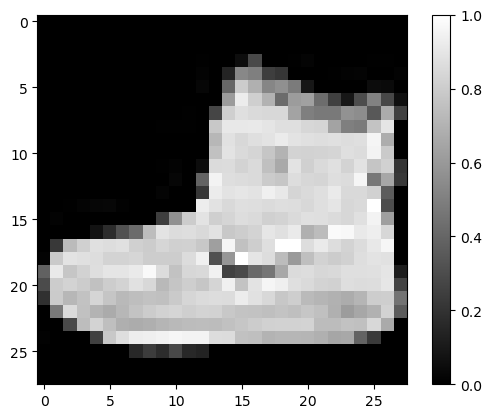

In [13]:
# No information has been lost in the conversion process!
import matplotlib.pyplot as plt
plt.imshow(t.squeeze(), cmap="grey")
plt.colorbar()
None

## Neural Network Model

In [14]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = torch.nn.Flatten()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(28*28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [15]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [16]:
list(model.parameters()) # At the moment, the model state (set of parameters) is random since the model has not been trained

[Parameter containing:
 tensor([[ 0.0230, -0.0045,  0.0263,  ...,  0.0356, -0.0111, -0.0057],
         [-0.0183, -0.0146,  0.0041,  ..., -0.0002, -0.0155,  0.0008],
         [-0.0131,  0.0150, -0.0250,  ..., -0.0039, -0.0221, -0.0019],
         ...,
         [-0.0298, -0.0247, -0.0011,  ..., -0.0224,  0.0046, -0.0083],
         [ 0.0278,  0.0268, -0.0158,  ..., -0.0219,  0.0096,  0.0248],
         [ 0.0269,  0.0055, -0.0336,  ..., -0.0210, -0.0175,  0.0267]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0108, -0.0301,  0.0014, -0.0018, -0.0046,  0.0179,  0.0126, -0.0315,
          0.0142,  0.0313,  0.0137,  0.0255, -0.0289, -0.0190, -0.0036, -0.0230,
          0.0309,  0.0215, -0.0083, -0.0277, -0.0172, -0.0317,  0.0117, -0.0075,
         -0.0357, -0.0323,  0.0151, -0.0009,  0.0280,  0.0302,  0.0274,  0.0101,
         -0.0124, -0.0153, -0.0020, -0.0006,  0.0111,  0.0306,  0.0322, -0.0354,
         -0.0039,  0.0196,  0.0198, -0.0320, -0.0192,  0.0105,  0.0230,  0.0002

In [17]:
to_tensor = torchvision.transforms.ToTensor()
input = to_tensor(image)
output = model(input)
output

tensor([[ 0.0139, -0.0943, -0.0889,  0.0154,  0.0115, -0.0701, -0.0614,  0.1164,
         -0.0310,  0.0173]], grad_fn=<AddmmBackward0>)

In [18]:
logits = output.data.squeeze()
probas = torch.nn.functional.softmax(logits, dim=-1)
probas

tensor([0.1030, 0.0924, 0.0929, 0.1031, 0.1027, 0.0947, 0.0955, 0.1141, 0.0984,
        0.1033])

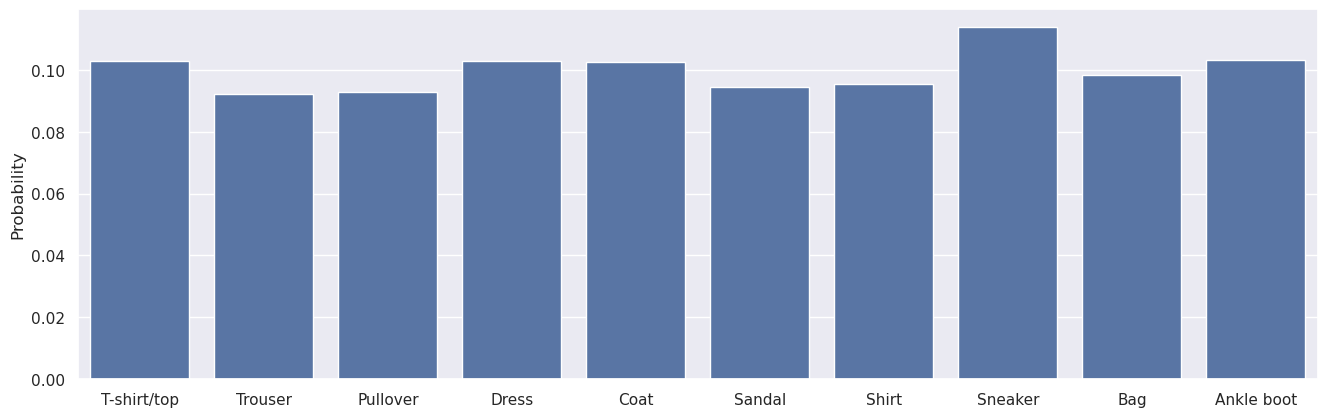

In [19]:
import seaborn as sns; sns.set_theme()
data = {training_data.classes[i]: p.item() for i, p in enumerate(probas)}
sns.barplot(data)
plt.gcf().set_figwidth(16)
plt.gca().set_ylabel("Probability")
None

In [20]:
index = probas.argmax().item()
index

7

In [53]:
training_data.classes[index] # The choice of the untrained model for image; probably False!

'Sneaker'

### Under the Hood

In [22]:
model.flatten

Flatten(start_dim=1, end_dim=-1)

In [23]:
image

In [24]:
t = torchvision.transforms.ToTensor()(image)
t

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [25]:
model.flatten(t)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0

In [26]:
model.linear_relu_stack

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
)

In [27]:
L1 = model.linear_relu_stack[0]
L1

Linear(in_features=784, out_features=512, bias=True)

In [28]:
L1.in_features == 28 * 28

True

In [29]:
L1_params = {name: param.data for name, param in L1.named_parameters()}
print(L1_params)

{'weight': tensor([[ 0.0230, -0.0045,  0.0263,  ...,  0.0356, -0.0111, -0.0057],
        [-0.0183, -0.0146,  0.0041,  ..., -0.0002, -0.0155,  0.0008],
        [-0.0131,  0.0150, -0.0250,  ..., -0.0039, -0.0221, -0.0019],
        ...,
        [-0.0298, -0.0247, -0.0011,  ..., -0.0224,  0.0046, -0.0083],
        [ 0.0278,  0.0268, -0.0158,  ..., -0.0219,  0.0096,  0.0248],
        [ 0.0269,  0.0055, -0.0336,  ..., -0.0210, -0.0175,  0.0267]]), 'bias': tensor([-0.0108, -0.0301,  0.0014, -0.0018, -0.0046,  0.0179,  0.0126, -0.0315,
         0.0142,  0.0313,  0.0137,  0.0255, -0.0289, -0.0190, -0.0036, -0.0230,
         0.0309,  0.0215, -0.0083, -0.0277, -0.0172, -0.0317,  0.0117, -0.0075,
        -0.0357, -0.0323,  0.0151, -0.0009,  0.0280,  0.0302,  0.0274,  0.0101,
        -0.0124, -0.0153, -0.0020, -0.0006,  0.0111,  0.0306,  0.0322, -0.0354,
        -0.0039,  0.0196,  0.0198, -0.0320, -0.0192,  0.0105,  0.0230,  0.0002,
        -0.0120, -0.0254,  0.0017, -0.0205, -0.0108,  0.0261, -0.0

In [30]:
b1 = L1_params["bias"]
b1.shape

torch.Size([512])

In [31]:
A1 = L1_params["weight"]
A1.shape

torch.Size([512, 784])

In [32]:
to_tensor = torchvision.transforms.ToTensor() 
t = to_tensor(image)
print(t.shape)
tf = torch.flatten(t)
print(tf.shape)
x1 = A1 @ tf + b1
x1

torch.Size([1, 28, 28])
torch.Size([784])


tensor([-4.4293e-02,  1.3939e-01,  4.7380e-01, -2.0820e-01, -4.6275e-01,
         3.3047e-01,  5.5749e-01,  3.0371e-01,  2.0104e-01,  5.0843e-01,
         2.6124e-01, -2.9305e-01,  1.7364e-01, -2.7984e-01,  7.7666e-01,
        -6.4427e-01, -1.3859e-01, -5.4380e-01,  1.3325e-01,  6.0847e-02,
         4.7861e-01, -2.4476e-01,  5.0218e-02,  9.4682e-02,  5.6835e-02,
         4.8401e-01, -1.6502e-01,  7.7241e-02, -3.0294e-01,  4.9954e-02,
         3.5371e-01,  3.5922e-01,  3.2098e-02, -3.6836e-01,  1.6131e-01,
         7.4548e-02,  5.4979e-01, -2.1269e-01,  4.7757e-01, -4.9138e-01,
        -3.3936e-01,  4.7829e-01, -4.0035e-02,  1.3953e-01, -4.6600e-01,
         1.5693e-01,  2.1964e-01,  3.5211e-01,  2.4685e-02, -1.0430e-01,
         5.1048e-01, -1.4405e-01, -3.2486e-01,  2.4939e-01,  3.0718e-01,
         1.2619e-01, -1.0841e-01,  2.3229e-01,  8.5358e-02, -2.6793e-01,
        -2.1276e-01,  2.0563e-01, -1.7556e-01, -4.6214e-01, -4.1338e-01,
        -7.2169e-02,  2.5929e-01,  2.0364e-02, -2.3

In [33]:
first_relu = model.linear_relu_stack[1]
x2 = first_relu(x1)
x2

tensor([0.0000, 0.1394, 0.4738, 0.0000, 0.0000, 0.3305, 0.5575, 0.3037, 0.2010,
        0.5084, 0.2612, 0.0000, 0.1736, 0.0000, 0.7767, 0.0000, 0.0000, 0.0000,
        0.1333, 0.0608, 0.4786, 0.0000, 0.0502, 0.0947, 0.0568, 0.4840, 0.0000,
        0.0772, 0.0000, 0.0500, 0.3537, 0.3592, 0.0321, 0.0000, 0.1613, 0.0745,
        0.5498, 0.0000, 0.4776, 0.0000, 0.0000, 0.4783, 0.0000, 0.1395, 0.0000,
        0.1569, 0.2196, 0.3521, 0.0247, 0.0000, 0.5105, 0.0000, 0.0000, 0.2494,
        0.3072, 0.1262, 0.0000, 0.2323, 0.0854, 0.0000, 0.0000, 0.2056, 0.0000,
        0.0000, 0.0000, 0.0000, 0.2593, 0.0204, 0.0000, 0.0000, 0.4326, 0.1536,
        0.0000, 0.0000, 0.0000, 0.2189, 0.0000, 0.0000, 0.0000, 0.1785, 0.0000,
        0.6693, 0.0000, 0.0000, 0.0000, 0.0000, 0.3905, 0.0000, 0.0000, 0.0747,
        0.6647, 0.1660, 0.0000, 0.0000, 0.1607, 0.4325, 0.0000, 0.0862, 0.0000,
        0.0000, 0.0000, 0.0000, 0.1373, 0.0000, 0.0000, 0.3499, 0.0000, 0.0000,
        0.0000, 0.2851, 0.0000, 0.0000, 

In [34]:
list(first_relu.named_parameters())

[]

In [35]:
L2 = model.linear_relu_stack[2]
L2_params = {name: param.data for name, param in L2.named_parameters()}
A2 = L2_params["weight"]
b2 = L2_params["bias"]
x3 = A2 @ x2 + b2
x3

tensor([-7.2385e-03, -2.3129e-02, -4.1123e-02,  5.0461e-02, -1.4418e-01,
         1.9569e-02,  3.6898e-02, -8.6066e-02, -1.9259e-01, -9.3374e-03,
        -4.9300e-02,  1.1201e-01,  8.9127e-02, -5.4551e-02,  1.7949e-01,
         9.1794e-02, -3.3607e-02,  2.0735e-01,  1.3224e-01,  1.1452e-01,
        -1.2490e-01,  6.7868e-02, -9.4296e-02, -1.5082e-01, -2.3773e-03,
         1.1493e-02, -1.2468e-01, -4.9620e-02, -6.8363e-02,  2.1301e-01,
        -1.4942e-01,  1.9173e-01,  9.9925e-02, -8.2657e-02, -9.6540e-02,
         1.9780e-02, -4.3814e-02, -3.5346e-01, -1.7261e-01, -5.5351e-02,
         3.3522e-02,  1.5838e-01,  1.7500e-01,  2.2884e-01, -2.5583e-02,
         1.2535e-01, -1.9156e-01, -1.7659e-01, -1.7264e-01, -1.2669e-02,
        -6.7571e-03, -5.0718e-02, -1.4418e-01,  1.3661e-01, -1.4262e-01,
         1.4171e-01,  3.1860e-02, -7.5391e-02, -2.5933e-01,  1.1251e-01,
        -2.1731e-02, -1.4927e-01,  9.1277e-02,  6.4649e-02, -1.3537e-01,
        -9.5621e-02,  2.3903e-01, -2.7972e-02,  1.6

In [36]:
second_relu = model.linear_relu_stack[3]
x4 = second_relu(x3)
x4

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0461e-02, 0.0000e+00, 1.9569e-02,
        3.6898e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1201e-01,
        8.9127e-02, 0.0000e+00, 1.7949e-01, 9.1794e-02, 0.0000e+00, 2.0735e-01,
        1.3224e-01, 1.1452e-01, 0.0000e+00, 6.7868e-02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.1493e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.1301e-01,
        0.0000e+00, 1.9173e-01, 9.9925e-02, 0.0000e+00, 0.0000e+00, 1.9780e-02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3522e-02, 1.5838e-01,
        1.7500e-01, 2.2884e-01, 0.0000e+00, 1.2535e-01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3661e-01,
        0.0000e+00, 1.4171e-01, 3.1860e-02, 0.0000e+00, 0.0000e+00, 1.1251e-01,
        0.0000e+00, 0.0000e+00, 9.1277e-02, 6.4649e-02, 0.0000e+00, 0.0000e+00,
        2.3903e-01, 0.0000e+00, 1.6708e-01, 7.3380e-02, 0.0000e+00, 7.4416e-02,
        9.5757e-02, 0.0000e+00, 0.0000e+

In [37]:
L3 = model.linear_relu_stack[4]
L3_params = {name: param.data for name, param in L3.named_parameters()}
A3 = L3_params["weight"]
b3 = L3_params["bias"]
x5 = A3 @ x4 + b3
x5

tensor([ 0.0139, -0.0943, -0.0889,  0.0154,  0.0115, -0.0701, -0.0614,  0.1164,
        -0.0310,  0.0173])

In [38]:
def softmax(x):
    return torch.nn.functional.softmax(x, dim=0)

ps = softmax(x5)
ps

tensor([0.1030, 0.0924, 0.0929, 0.1031, 0.1027, 0.0947, 0.0955, 0.1141, 0.0984,
        0.1033])

In [39]:
data = {training_data.classes[i]: p.item() for i, p in enumerate(ps)}
data

{'T-shirt/top': 0.10295285284519196,
 'Trouser': 0.09239115566015244,
 'Pullover': 0.0928964912891388,
 'Dress': 0.1031104251742363,
 'Coat': 0.10270444303750992,
 'Sandal': 0.0946599543094635,
 'Shirt': 0.09548187255859375,
 'Sneaker': 0.11406859010457993,
 'Bag': 0.09842811524868011,
 'Ankle boot': 0.10330613702535629}

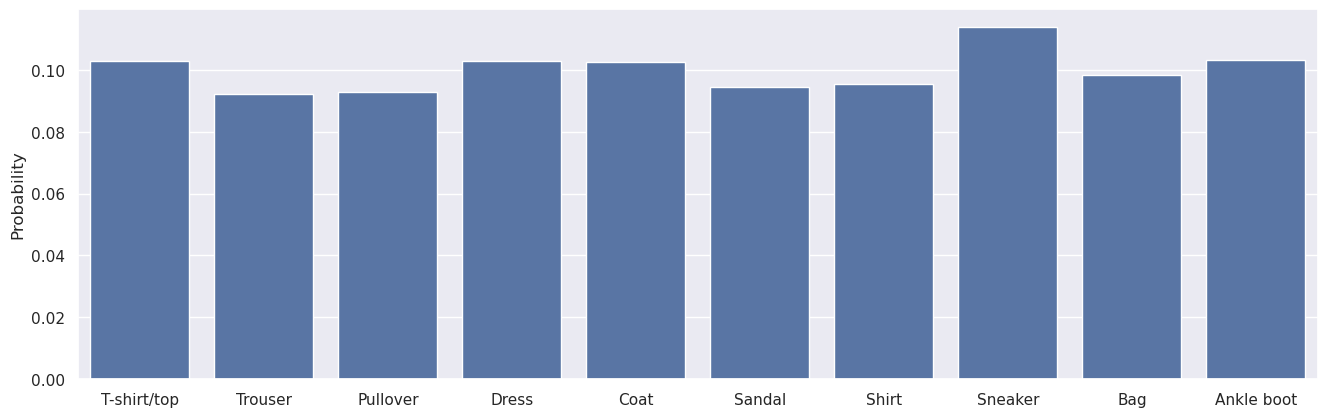

In [40]:
import seaborn as sns; sns.set_theme()
sns.barplot(data)
plt.gcf().set_figwidth(16)
plt.gca().set_ylabel("Probability")
None

In [41]:
out = model(t).data.squeeze()

In [42]:
ps = torch.nn.functional.softmax(out, dim=-1)

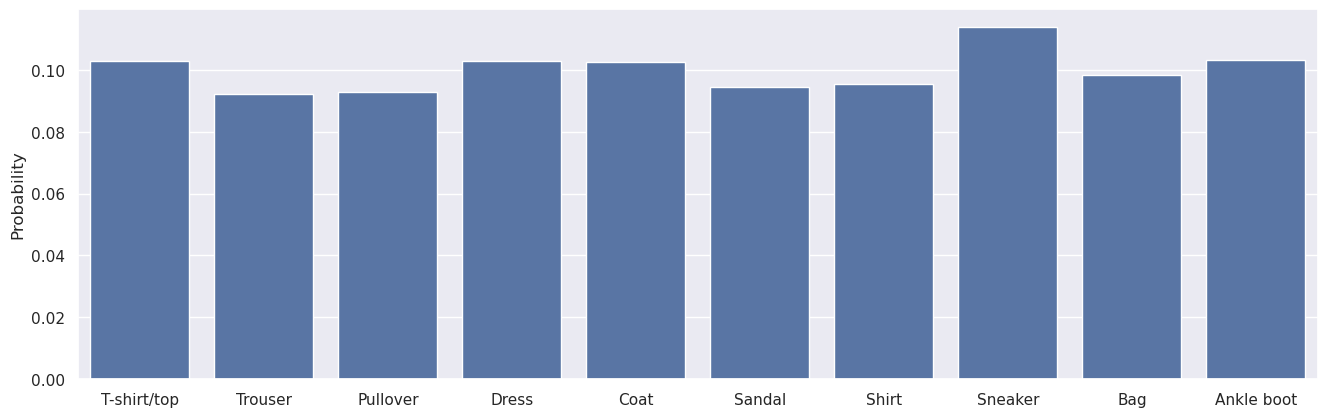

In [43]:
data = {training_data.classes[i]: p.item() for i, p in enumerate(ps)}
sns.barplot(data)
plt.gcf().set_figwidth(16)
plt.gca().set_ylabel("Probability")
None

## Training

In [44]:
batch_size = 64

# Create data loaders.
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [45]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [46]:
X, y = next(iter(train_dataloader)) # first dataloader input/ouput batch

In [47]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [48]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [49]:
test(test_dataloader, model, loss_fn)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Test Error: 
 Accuracy: 10.0%, Avg loss: 2.300703 

Epoch 1
-------------------------------
loss: 2.297727  [   64/60000]
loss: 2.285681  [ 6464/60000]
loss: 2.269073  [12864/60000]
loss: 2.263202  [19264/60000]
loss: 2.246423  [25664/60000]
loss: 2.223307  [32064/60000]
loss: 2.215047  [38464/60000]
loss: 2.189490  [44864/60000]
loss: 2.188131  [51264/60000]
loss: 2.148561  [57664/60000]
Test Error: 
 Accuracy: 57.4%, Avg loss: 2.151824 

Epoch 2
-------------------------------
loss: 2.158888  [   64/60000]
loss: 2.153066  [ 6464/60000]
loss: 2.097754  [12864/60000]
loss: 2.115173  [19264/60000]
loss: 2.068567  [25664/60000]
loss: 2.014776  [32064/60000]
loss: 2.022986  [38464/60000]
loss: 1.953969  [44864/60000]
loss: 1.960876  [51264/60000]
loss: 1.883715  [57664/60000]
Test Error: 
 Accuracy: 60.8%, Avg loss: 1.890137 

Epoch 3
-------------------------------
loss: 1.916416  [   64/60000]
loss: 1.899186  [ 6464/60000]
loss: 1.778378  [12864/60000]
loss: 1.821047  [19264/60000]
loss

In [50]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Use the Model

In [51]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [52]:
classes = test_data.classes

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


Known category: Ankle boot
Predicted category: Ankle boot


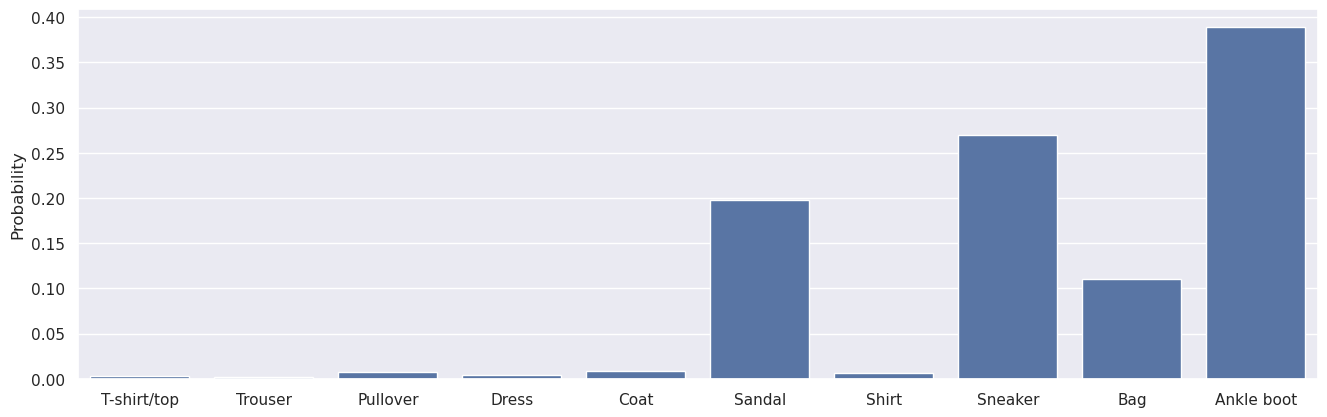

In [58]:
model.eval()
input, output = test_data[0][0], test_data[0][1]
print(f"Known category: {test_data.classes[output]}")
logits = model(input)
logits = logits.data.squeeze()
probas = torch.nn.functional.softmax(logits, dim=-1)
print(f"Predicted category: {test_data.classes[probas.argmax().item()]}")
data = {training_data.classes[i]: p.item() for i, p in enumerate(probas)}
sns.barplot(data)
plt.gcf().set_figwidth(16)
plt.gca().set_ylabel("Probability")
None